In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your clustered DataFrame (adjust path as needed)
# If you already have df_clustered in memory, skip this cell
data_path = '../../data/nifty/train/full_featured.csv'
df = pd.read_csv(data_path)

# Re-run clustering if needed (same as before)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = [
    'daily_return', 'log_return', 'price_range',
    'ma_5', 'ma_20', 'volatility_5', 'volatility_20',
    'rsi_14', 'macd_12_26', 'macd_signal_12_26', 'macd_histogram_12_26',
    'stoch_14', 'stoch_smoothk', 'stoch_smoothd','trend_code'
]
X = df[features].dropna().copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
k = 3  # Use the number of clusters you chose previously
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_clustered = df.loc[X.index].copy()
df_clustered['cluster'] = clusters

ValueError: could not convert string to float: 'Downtrend'

In [ ]:
cluster_stats = df_clustered.groupby('cluster').agg(
    avg_daily_return=('daily_return', 'mean'),
    avg_price_range=('price_range', 'mean'),
    volatility=('daily_return', 'std'),
    num_days=('daily_return', 'count')
)
print(cluster_stats)

         avg_daily_return  avg_price_range  volatility  num_days
cluster                                                         
0                0.015638       132.718920    0.020582       537
1               -0.005435       121.530570    0.013826      2193
2                0.002047        89.887232    0.008506      3407


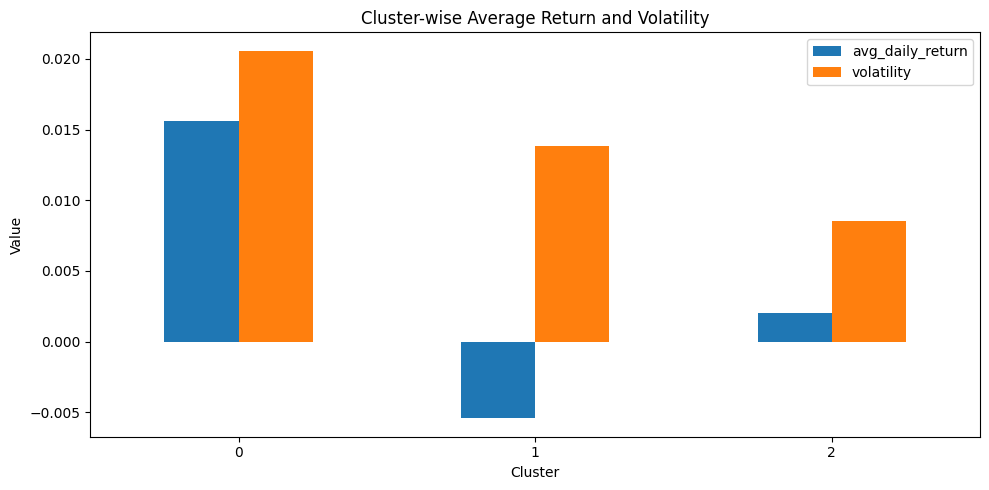

In [ ]:
cluster_stats[['avg_daily_return', 'volatility']].plot(kind='bar', figsize=(10, 5))
plt.title('Cluster-wise Average Return and Volatility')
plt.ylabel('Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

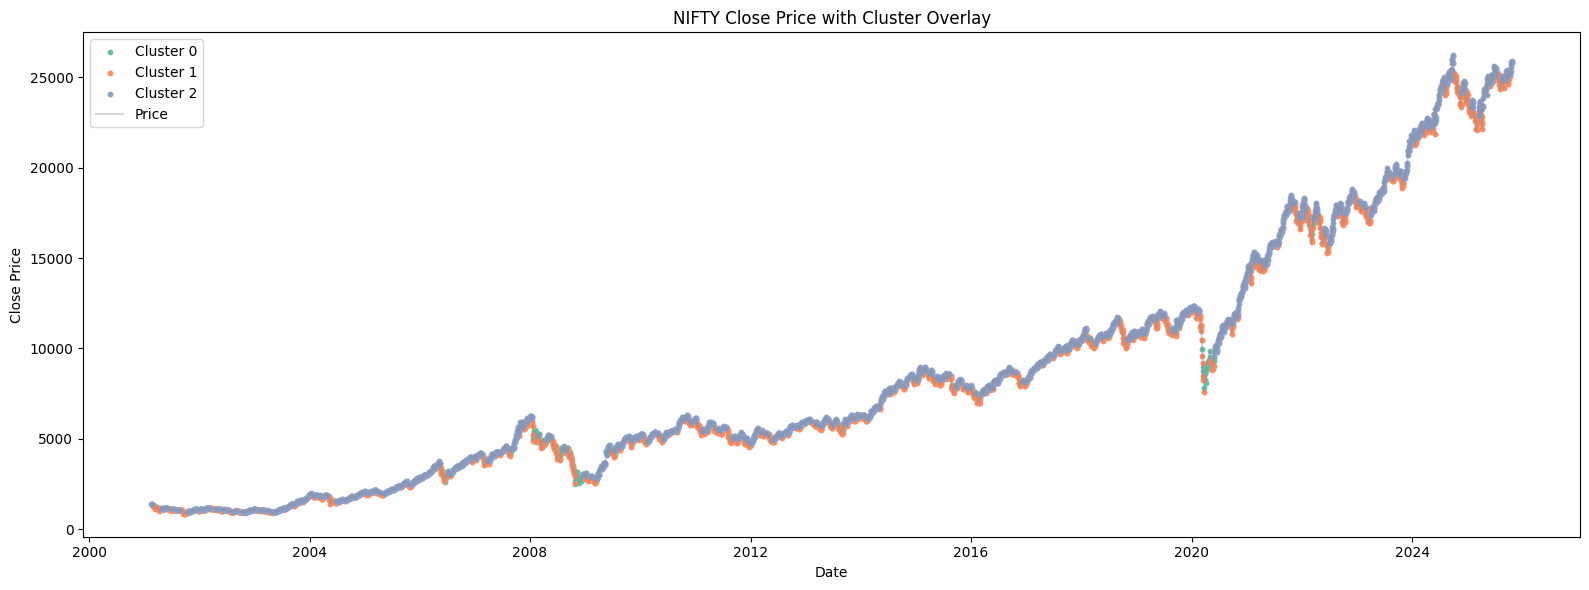

In [ ]:
import matplotlib.dates as mdates

# Convert 'date' column to datetime if not already
df_clustered['date'] = pd.to_datetime(df_clustered['date'])

plt.figure(figsize=(16, 6))
palette = sns.color_palette('Set2', n_colors=df_clustered['cluster'].nunique())

for cluster in sorted(df_clustered['cluster'].unique()):
    cluster_data = df_clustered[df_clustered['cluster'] == cluster]
    plt.scatter(
        cluster_data['date'],
        cluster_data['close'],
        label=f'Cluster {cluster}',
        s=10,
        color=palette[cluster]
    )

plt.plot(df_clustered['date'], df_clustered['close'], color='gray', alpha=0.3, label='Price')
plt.title('NIFTY Close Price with Cluster Overlay')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()

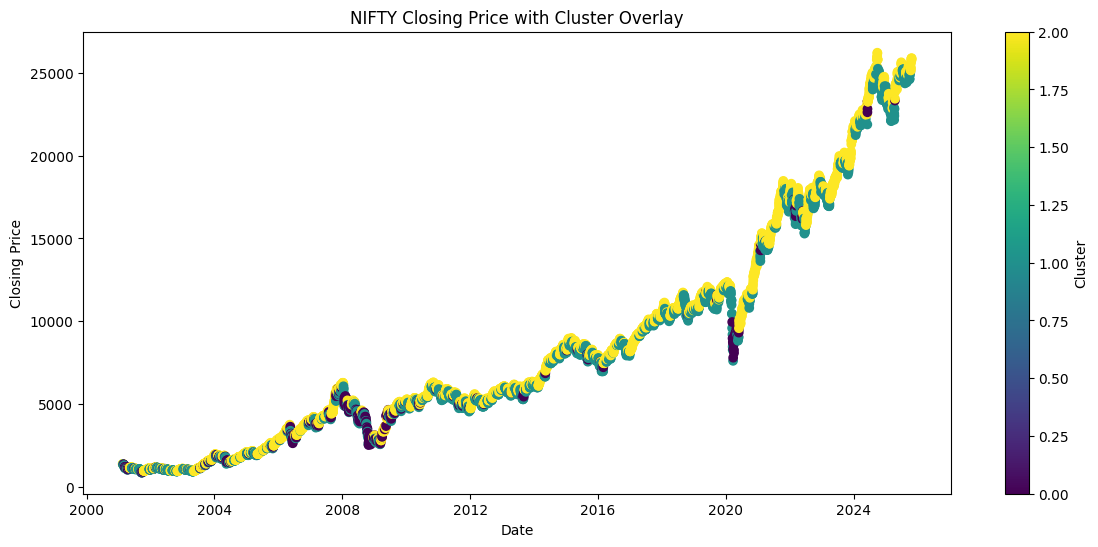

In [ ]:
import matplotlib.pyplot as plt

# Ensure 'date' is datetime for proper plotting
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(14, 6))
scatter = plt.scatter(df_clustered['date'], df_clustered['close'], c=df_clustered['cluster'], cmap='viridis', label=df_clustered['cluster'])
plt.title('NIFTY Closing Price with Cluster Overlay')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [ ]:
print(df_clustered['cluster'].unique())
print("Number of clusters:", df_clustered['cluster'].nunique())

# Group by cluster and calculate stats
cluster_stats = df_clustered.groupby('cluster')['daily_return'].agg(['mean', 'std', 'count'])
cluster_stats.rename(columns={'mean': 'avg_return', 'std': 'volatility', 'count': 'num_days'}, inplace=True)
print(cluster_stats)


[2 1 0]
Number of clusters: 3
         avg_return  volatility  num_days
cluster                                  
0          0.015638    0.020582       537
1         -0.005435    0.013826      2193
2          0.002047    0.008506      3407


In [ ]:
cluster_description = {
    0: "Uptrend/Profitable",
    1: "Downtrend/High Volatility",
    2: "Sideways/Low Volatility"
}

In [ ]:
df_clustered['cluster_description'] = df_clustered['cluster'].map(cluster_description)
# Show a sample of the table
# For a specific date, e.g., 20 Jul 2024
specific_date = '2021-07-20'
row = df_clustered[df_clustered['date'] == specific_date][['date', 'cluster', 'cluster_description', 'daily_return']]
print(row)

import pandas as pd
from IPython.display import display

display(df_clustered.head(20))  # Show first 20 rows
df_clustered.to_csv('clustered_dates_with_description.csv', index=False)

                          date  cluster        cluster_description  \
5111 2021-07-20 00:00:00+05:30        1  Downtrend/High Volatility   

      daily_return  
5111     -0.007637  


,date,open,high,low,close,volume,final_trend,daily_return,log_return,price_range,...,rsi_14,macd_12_26,macd_signal_12_26,macd_histogram_12_26,macd_signal_strength,stoch_14,stoch_smoothk,stoch_smoothd,cluster,cluster_description
33,2001-02-16 00:00:00+05:30,1415.85,1422.95,1376.15,1381.35,0.0,Downtrend,-0.024952,-0.025269,46.80,...,56.121245,24.611369,26.630119,-2.018750,2.018750,49.268293,74.394226,79.212137,2,Sideways/Low Volatility
34,2001-02-19 00:00:00+05:30,1381.40,1392.05,1369.45,1384.80,0.0,Sideways,0.002498,0.002494,22.60,...,56.975273,22.668833,25.837862,-3.169029,3.169029,53.475610,66.265109,74.632775,2,Sideways/Low Volatility
35,2001-02-20 00:00:00+05:30,1384.85,1392.80,1380.40,1383.85,0.0,Sideways,-0.000686,-0.000686,12.40,...,56.648313,20.812784,24.832846,-4.020062,4.020062,52.317073,51.686992,64.115442,2,Sideways/Low Volatility
36,2001-02-21 00:00:00+05:30,1383.90,1389.55,1364.25,1370.10,0.0,Downtrend,-0.009936,-0.009986,25.30,...,51.997258,18.024566,23.471190,-5.446624,5.446624,21.877310,42.556664,53.502922,1,Downtrend/High Volatility
37,2001-02-22 00:00:00+05:30,1370.05,1370.05,1335.65,1355.10,0.0,Downtrend,-0.010948,-0.011008,34.40,...,47.422941,14.438076,21.664568,-7.226491,7.226491,22.279496,32.157960,42.133872,1,Downtrend/High Volatility
38,2001-02-23 00:00:00+05:30,1355.10,1362.80,1314.10,1320.45,0.0,Downtrend,-0.025570,-0.025903,48.70,...,38.908004,8.699509,19.071556,-10.372047,10.372047,5.833716,16.663507,30.459377,1,Downtrend/High Volatility
39,2001-02-26 00:00:00+05:30,1320.90,1325.20,1299.05,1312.40,0.0,Downtrend,-0.006096,-0.006115,26.15,...,37.235277,3.462175,15.949680,-12.487505,12.487505,10.774818,12.962677,20.594715,1,Downtrend/High Volatility
40,2001-02-27 00:00:00+05:30,1312.45,1324.00,1281.90,1295.55,0.0,Downtrend,-0.012839,-0.012922,42.10,...,33.945567,-2.024764,12.354791,-14.379555,14.379555,9.677419,8.761985,12.796056,1,Downtrend/High Volatility
41,2001-02-28 00:00:00+05:30,1295.30,1362.25,1294.59,1351.40,0.0,Uptrend,0.043109,0.042206,67.66,...,49.782363,-1.845302,9.514772,-11.360074,11.360074,49.273307,23.241848,14.988837,0,Uptrend/Profitable
42,2001-03-01 00:00:00+05:30,1351.75,1399.55,1345.05,1358.05,0.0,Uptrend,0.004921,0.004909,54.50,...,51.280165,-1.153185,7.381181,-8.534366,8.534366,53.987948,37.646225,23.216686,0,Uptrend/Profitable


In [ ]:
# Ensure the data is sorted by date
df_clustered = df_clustered.sort_values('date').reset_index(drop=True)

# Identify where the cluster changes
df_clustered['cluster_change'] = (df_clustered['cluster'] != df_clustered['cluster'].shift()).cumsum()

# Now, each unique value in 'cluster_change' is a run of consecutive days with the same cluster
# Group by consecutive runs
run_stats = df_clustered.groupby('cluster_change').agg(
    start_date=('date', 'first'),
    end_date=('date', 'last'),
    cluster=('cluster', 'first'),
    num_days=('date', 'count'),
    avg_daily_return=('daily_return', 'mean'),
    avg_price_range=('price_range', 'mean'),
    volatility=('daily_return', 'std')
).reset_index(drop=True)

# Make sure long_runs is a copy
long_runs = run_stats.copy()

# Bin avg_daily_return into 3 quantiles
long_runs['return_group'] = pd.qcut(long_runs['avg_daily_return'], 3, labels=['Low Return', 'Medium Return', 'High Return'])

# Bin volatility into 3 quantiles
long_runs['vol_group'] = pd.qcut(long_runs['volatility'], 3, labels=['Low Volatility', 'Medium Volatility', 'High Volatility'])

def define_regime(row):
    if row['return_group'] == 'Low Return' and row['vol_group'] == 'Low Volatility':
        return 'Sideways/Calm'
    elif row['return_group'] == 'High Return' and row['vol_group'] == 'Low Volatility':
        return 'Steady Uptrend'
    elif row['return_group'] == 'High Return' and row['vol_group'] == 'High Volatility':
        return 'Volatile Uptrend'
    elif row['return_group'] == 'Low Return' and row['vol_group'] == 'High Volatility':
        return 'Volatile Down/Sideways'
    elif row['return_group'] == 'Medium Return' and row['vol_group'] == 'Medium Volatility':
        return 'Neutral'
    # Add more rules as you see fit
    else:
        return f"{row['return_group']} / {row['vol_group']}"

long_runs['regime'] = long_runs.apply(define_regime, axis=1)

print(long_runs[['start_date', 'end_date', 'cluster', 'num_days', 'avg_daily_return', 'volatility', 'return_group', 'vol_group', 'regime']])

                   start_date                  end_date  cluster  num_days  \
0   2001-02-16 00:00:00+05:30 2001-02-20 00:00:00+05:30        2         3   
1   2001-02-21 00:00:00+05:30 2001-02-27 00:00:00+05:30        1         5   
2   2001-02-28 00:00:00+05:30 2001-03-01 00:00:00+05:30        0         2   
3   2001-03-02 00:00:00+05:30 2001-03-05 00:00:00+05:30        1         2   
4   2001-03-07 00:00:00+05:30 2001-03-07 00:00:00+05:30        0         1   
..                        ...                       ...      ...       ...   
876 2025-08-19 00:00:00+05:30 2025-08-25 00:00:00+05:30        2         5   
877 2025-08-26 00:00:00+05:30 2025-09-08 00:00:00+05:30        1         9   
878 2025-09-09 00:00:00+05:30 2025-09-24 00:00:00+05:30        2        12   
879 2025-09-25 00:00:00+05:30 2025-10-08 00:00:00+05:30        1         9   
880 2025-10-09 00:00:00+05:30 2025-10-24 00:00:00+05:30        2        11   

     avg_daily_return  volatility   return_group          vol_g

In [ ]:
# Ensure the data is sorted by date
df_clustered = df_clustered.sort_values('date').reset_index(drop=True)

# Identify where the cluster changes
df_clustered['cluster_change'] = (df_clustered['cluster'] != df_clustered['cluster'].shift()).cumsum()

# Now, each unique value in 'cluster_change' is a run of consecutive days with the same cluster
# Group by consecutive runs
run_stats = df_clustered.groupby('cluster_change').agg(
    start_date=('date', 'first'),
    end_date=('date', 'last'),
    cluster=('cluster', 'first'),
    num_days=('date', 'count'),
    avg_daily_return=('daily_return', 'mean'),
    avg_price_range=('price_range', 'mean'),
    volatility=('daily_return', 'std')
).reset_index(drop=True)

# Make sure long_runs is a copy
long_runs = long_runs.copy()

# Bin avg_daily_return into 3 quantiles
long_runs['return_group'] = pd.qcut(long_runs['avg_daily_return'], 3, labels=['Low Return', 'Medium Return', 'High Return'])

# Bin volatility into 3 quantiles
long_runs['vol_group'] = pd.qcut(long_runs['volatility'], 3, labels=['Low Volatility', 'Medium Volatility', 'High Volatility'])

def define_regime(row):
    if row['return_group'] == 'Low Return' and row['vol_group'] == 'Low Volatility':
        return 'Sideways/Calm'
    elif row['return_group'] == 'High Return' and row['vol_group'] == 'Low Volatility':
        return 'Steady Uptrend'
    elif row['return_group'] == 'High Return' and row['vol_group'] == 'High Volatility':
        return 'Volatile Uptrend'
    elif row['return_group'] == 'Low Return' and row['vol_group'] == 'High Volatility':
        return 'Volatile Down/Sideways'
    elif row['return_group'] == 'Medium Return' and row['vol_group'] == 'Medium Volatility':
        return 'Neutral'
    # Add more rules as you see fit
    else:
        return f"{row['return_group']} / {row['vol_group']}"

long_runs['regime'] = long_runs.apply(define_regime, axis=1)

print(long_runs[['start_date', 'end_date', 'cluster', 'num_days', 'avg_daily_return', 'volatility', 'return_group', 'vol_group', 'regime']])

                   start_date                  end_date  cluster  num_days  \
0   2001-02-16 00:00:00+05:30 2001-02-20 00:00:00+05:30        2         3   
1   2001-02-21 00:00:00+05:30 2001-02-27 00:00:00+05:30        1         5   
2   2001-02-28 00:00:00+05:30 2001-03-01 00:00:00+05:30        0         2   
3   2001-03-02 00:00:00+05:30 2001-03-05 00:00:00+05:30        1         2   
4   2001-03-07 00:00:00+05:30 2001-03-07 00:00:00+05:30        0         1   
..                        ...                       ...      ...       ...   
876 2025-08-19 00:00:00+05:30 2025-08-25 00:00:00+05:30        2         5   
877 2025-08-26 00:00:00+05:30 2025-09-08 00:00:00+05:30        1         9   
878 2025-09-09 00:00:00+05:30 2025-09-24 00:00:00+05:30        2        12   
879 2025-09-25 00:00:00+05:30 2025-10-08 00:00:00+05:30        1         9   
880 2025-10-09 00:00:00+05:30 2025-10-24 00:00:00+05:30        2        11   

     avg_daily_return  volatility   return_group          vol_g